# Fast Flow

In [1]:
import pandas as pd
#trial,payload,size,task_size,workers,time

#load sequential times
seq_times = pd.read_csv('results/sequential.csv')
seq_times = seq_times.drop(columns=['trial'])

#load parallel base times
par_times = pd.read_csv('results/naive_ff.csv')
par_times = par_times[par_times['time'] > 0]
par_times = par_times.drop(columns=['trial'])

#load parallel working emitter times (queue size 1)
we_times = pd.read_csv('results/working_emitter_ff.csv')
we_times = we_times[we_times['time'] > 0]
we_times = we_times.drop(columns=['trial'])

#load parallel working emitter times (queue size 2)
we2_times = pd.read_csv('results/working_emitter_ff2.csv')
we2_times = we2_times[we2_times['time'] > 0]
we2_times = we2_times.drop(columns=['trial'])

In [2]:
par_times.head()

,payload,size,task_size,workers,time
0,1,10000,-1,1,0.001171
1,1,10000,-1,3,0.001497
2,1,10000,-1,7,0.001608
3,1,10000,-1,15,0.002245
4,1,10000,-1,31,0.004342


In [3]:
we_times.head()

,payload,size,task_size,workers,time
0,1,10000,-1,1,0.000828
1,1,10000,-1,3,0.001467
2,1,10000,-1,7,0.001248
3,1,10000,-1,15,0.002543
4,1,10000,-1,31,0.004945


we first keep the best time for each size, and then we use this to compare based on the payload

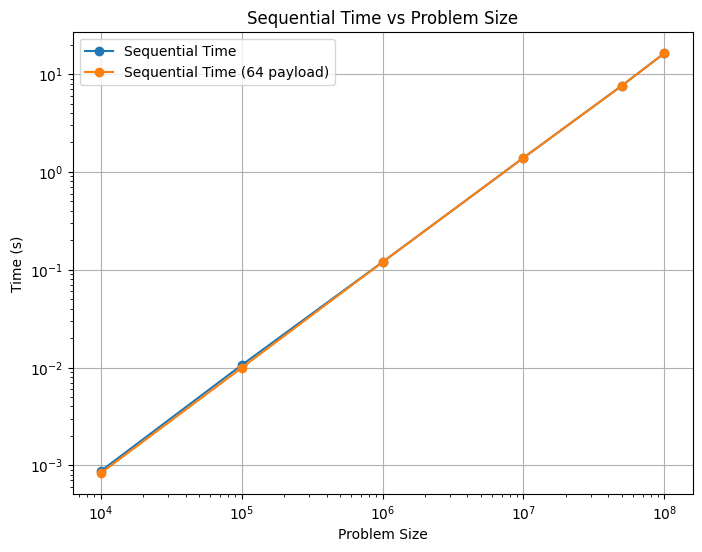

In [4]:
import matplotlib.pyplot as plt

small = seq_times[seq_times['payload'] == 1]
big = seq_times[seq_times['payload'] == 64]


# Plot sequential time vs problem size
plt.figure(figsize=(8, 6))
plt.plot(small['size'], small['time'], marker='o', label='Sequential Time')
plt.plot(big['size'], big['time'], marker='o', label='Sequential Time (64 payload)')
plt.xlabel('Problem Size')
plt.ylabel('Time (s)')
plt.title('Sequential Time vs Problem Size')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.show()

## Plots over different sizes

seem that the payload size does not impact much on a single machine, so from now on all test are done using a payload of 1 to speedup the process and consume less resources. Although the sotring time is not influenced the total time required to generate the array is significantly higher.

In [5]:
min_par_times = par_times.groupby(['size', 'workers']).agg({'time': 'min'}).reset_index()
#par_times = par_times.loc[par_times.groupby('size')['time'].idxmin()].reset_index(drop=True)

min_we_times = we_times.groupby(['size', 'workers']).agg({'time': 'min'}).reset_index()
#we_times = we_times.loc[we_times.groupby('size')['time'].idxmin()].reset_index(drop=True)

min_we2_times = we2_times.groupby(['size', 'workers']).agg({'time': 'min'}).reset_index()
#we2_times = we2_times.loc[we2_times.groupby('size')['time'].idxmin()].reset_index(drop=True)

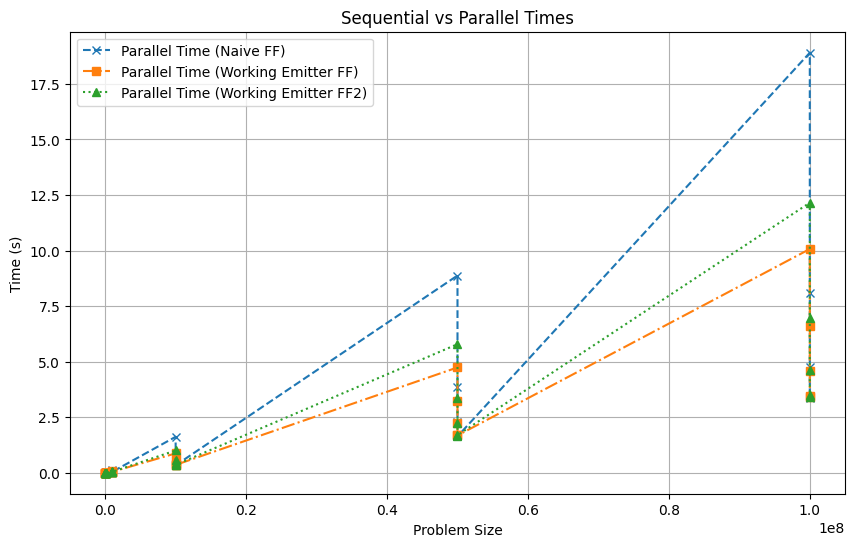

In [6]:
plt.figure(figsize=(10, 6))

# Plot sequential times
#plt.plot(small['size'], small['time'], marker='o', label='Sequential Time (Payload 1)')
#plt.plot(big['size'], big['time'], marker='o', label='Sequential Time (Payload 64)')

# Filter parallel times to show only the best time for each size
plt.plot(min_par_times['size'], min_par_times['time'], marker='x', label='Parallel Time (Naive FF)', linestyle='--')

# Filter working emitter times to show only the best time for each size
plt.plot(min_we_times['size'], min_we_times['time'], marker='s', label='Parallel Time (Working Emitter FF)', linestyle='-.')

plt.plot(min_we2_times['size'], min_we2_times['time'], marker='^', label='Parallel Time (Working Emitter FF2)', linestyle=':')

# Configure plot
plt.xlabel('Problem Size')
plt.ylabel('Time (s)')
plt.title('Sequential vs Parallel Times')
#plt.xscale('log')
#plt.yscale('log')
plt.legend()
plt.grid(True)
plt.show()

/tmp/ipykernel_821/1054100429.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  par_x = min_par_times[par_times['workers'] == numThreads -1]
/tmp/ipykernel_821/1054100429.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  we_x = min_we_times[we_times['workers'] == numThreads -1]
/tmp/ipykernel_821/1054100429.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  we2_x = min_we2_times[we2_times['workers'] == numThreads -1]


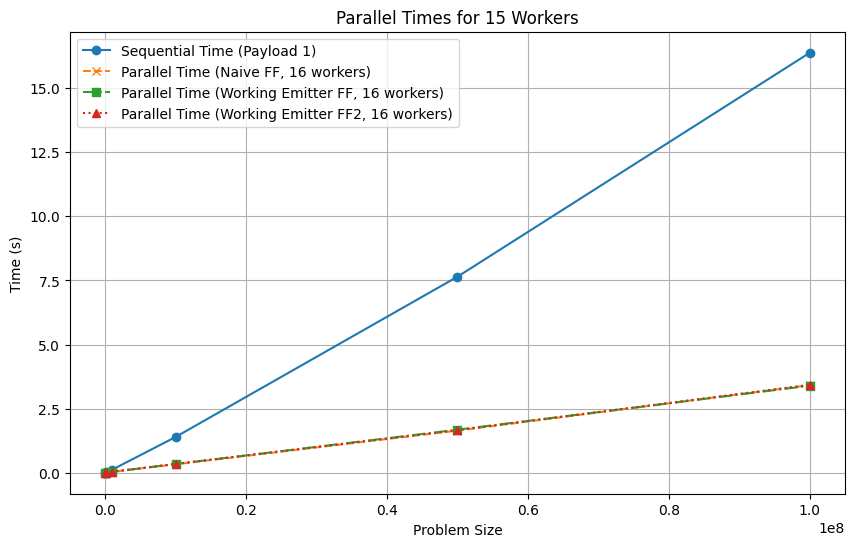

In [7]:
plt.figure(figsize=(10, 6))

numThreads =16

par_x = min_par_times[par_times['workers'] == numThreads -1]
par_x = par_x.reset_index(drop=True)
we_x = min_we_times[we_times['workers'] == numThreads -1]
we_x = we_x.reset_index(drop=True)
we2_x = min_we2_times[we2_times['workers'] == numThreads -1]
we2_x = we2_x.reset_index(drop=True)

# Plot sequential times
plt.plot(small['size'], small['time'], marker='o', label='Sequential Time (Payload 1)')

# Filter parallel times for workers = 16
plt.plot(par_x['size'], par_x['time'], marker='x', label='Parallel Time (Naive FF, 16 workers)', linestyle='--')

# Filter working emitter times for workers = 16
plt.plot(we_x['size'], we_x['time'], marker='s', label='Parallel Time (Working Emitter FF, 16 workers)', linestyle='-.')

plt.plot(we2_x['size'], we2_x['time'], marker='^', label='Parallel Time (Working Emitter FF2, 16 workers)', linestyle=':')
# Configure plot
plt.xlabel('Problem Size')
plt.ylabel('Time (s)')
plt.title(f'Parallel Times for {numThreads-1} Workers')
plt.legend()
plt.grid(True)
plt.show()


what about the speedup?

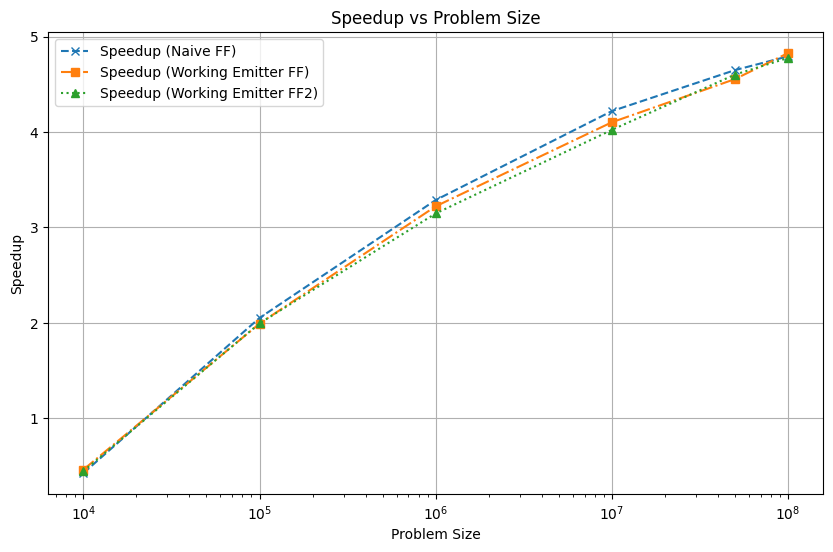

In [8]:
plt.figure(figsize=(10, 6))

# Calculate speedup for naive FF
speedup_naive = small['time'] / par_x['time']

# Calculate speedup for working emitter FF
speedup_emitter = small['time'] / we_x['time']

speedup_emitter_2 = small['time'] / we2_x['time']

# Plot speedup
plt.plot(par_x['size'], speedup_naive, marker='x', label='Speedup (Naive FF)', linestyle='--')
plt.plot(we_x['size'], speedup_emitter, marker='s', label='Speedup (Working Emitter FF)', linestyle='-.')
plt.plot(we2_x['size'], speedup_emitter_2, marker='^', label='Speedup (Working Emitter FF2)', linestyle=':')

plt.xscale('log')
#plt.yscale('log')

# Configure plot
plt.xlabel('Problem Size')
plt.ylabel('Speedup')
plt.title('Speedup vs Problem Size')
plt.legend()
plt.grid(True)
plt.show()

## Plots over biggest problem

In [30]:
SIZES = [10000, 100000, 1000000, 10000000, 50000000, 100000000]
problem_size = SIZES[0] 

big_par_times = par_times[(par_times['size'] == problem_size) & (par_times['payload'] == 1)].copy()
big_we_times = we_times[(we_times['size'] == problem_size) & (we_times['payload'] == 1)].copy()
big_we2_times = we2_times[(we2_times['size'] == problem_size) & (we2_times['payload'] == 1)].copy()
big_seq_times = seq_times[(seq_times['size'] == problem_size) & (seq_times['payload'] == 1)].copy()

big_par_times = big_par_times.reset_index(drop=True)
big_we_times = big_we_times.reset_index(drop=True)
big_we2_times = big_we2_times.reset_index(drop=True)
big_seq_times = big_seq_times.reset_index(drop=True)

# keep only the best time for each number of workers
big_par_times = big_par_times.loc[big_par_times.groupby('workers')['time'].idxmin()].reset_index(drop=True)
big_we_times = big_we_times.loc[big_we_times.groupby('workers')['time'].idxmin()].reset_index(drop=True)
big_we2_times = big_we2_times.loc[big_we2_times.groupby('workers')['time'].idxmin()].reset_index(drop=True)

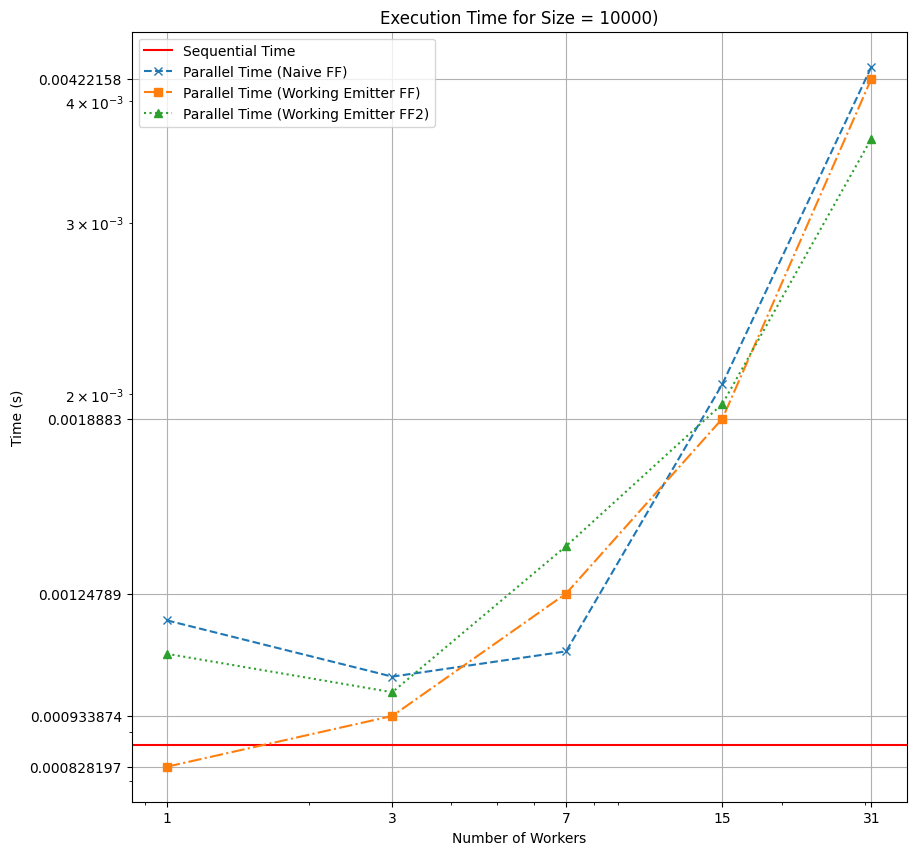

In [31]:
plt.figure(figsize=(10, 10))

# Plot sequential time
plt.axhline(y=big_seq_times['time'].iloc[0], color='r', linestyle='-', label='Sequential Time')

# Plot parallel naive FF times
plt.plot(big_par_times['workers'], big_par_times['time'], marker='x', label='Parallel Time (Naive FF)', linestyle='--')

# Plot working emitter FF times
plt.plot(big_we_times['workers'], big_we_times['time'], marker='s', label='Parallel Time (Working Emitter FF)', linestyle='-.')

# Plot working emitter FF2 times
plt.plot(big_we2_times['workers'], big_we2_times['time'], marker='^', label='Parallel Time (Working Emitter FF2)', linestyle=':')

# Configure plot
plt.xlabel('Number of Workers')
plt.ylabel('Time (s)')
plt.title(f'Execution Time for Size = {problem_size})')
plt.xscale('log')
plt.yscale('log')
plt.xticks(big_par_times['workers'], big_par_times['workers'])
plt.yticks(big_we_times['time'], big_we_times['time'])
plt.legend()
plt.grid(True)
plt.savefig(f'figures/execution_time_size_{problem_size}.png', dpi=500)
plt.show()

In [18]:
print("Sequential Times:")
print(big_seq_times.head())
print("Parallel Naive FF Times:")
print(big_par_times.head())
print("Working Emitter FF Times:")
print(big_we_times.head())
#print(big_we2_times.head())

Sequential Times:
   payload     size      time
0        1  1000000  0.119782
Parallel Naive FF Times:
   payload     size  task_size  workers      time
0        1  1000000         -1        1  0.134965
1        1  1000000      10000        3  0.062142
2        1  1000000      10000        7  0.043676
3        1  1000000      10000       15  0.036438
4        1  1000000      10000       31  0.042202
Working Emitter FF Times:
   payload     size  task_size  workers      time
0        1  1000000         -1        1  0.074854
1        1  1000000         -1        3  0.047923
2        1  1000000      10000        7  0.043126
3        1  1000000     100000       15  0.037181
4        1  1000000      10000       31  0.041807
